# Dimensionality Reduction
## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a statistical technique used for dimensionality reduction and data transformation. It aims to identify the directions (principal components) in which the data varies the most, and represents the data in a new coordinate system defined by these components.

The key idea behind PCA is to find a lower-dimensional representation of the data that captures the maximum amount of variance. It achieves this through an orthogonal projection of the original features into a smaller set of uncorrelated variables, called principal components. The first principal component is the direction that captures the most amount of variance in the data, followed by the second principal component, and so on. The principal components are linear combinations of the original features. 

Here's a step-by-step overview of how PCA works:
- **Standardize the data:** If the features have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances.

- **Compute the covariance matrix:** The covariance matrix is computed to understand the relationships and dependencies between the different features in the data.

- **Perform eigendecomposition:** The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

- **Select a number of principal components:** The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. The number of principal components to retain depends on thedesired level of dimensionality reduction.

- **Project the data onto the coordinate system defined by the chosen components:** The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

PCA is a powerful tool for exploratory data analysis, visualization, and feature extraction. It helps to identify patterns, reduce noise, and provide a concise representation of the data. PCA is widely used in various fields, including image processing, signal processing, genetics, finance, and social sciences, where dimensionality reduction and data compression are necessary.

<img src="./images/projplane.gif" width="400"/>

### General procedure (by hand)

Let's start by coding the algorithm by hand. Later on, we'll use Sklearn's PCA and project your data into the two first principal components

1. Standardize the data
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors of the covariance matrix
4. Select the most significant components (~95%) or the first two in case you want to visualize the projection
5. Transform the data

Here is a list of all the packages you'll need for today's lab:

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d

For our first example, we'll generate 50 random data points close to the line $y=2x$. 

In [ ]:
x = np.random.rand(50)
y = 2*x + np.random.rand(50)
df = pd.DataFrame(np.array([x,y]).T)
df.plot.scatter(x=0,y=1)

The code below performs all the needed operations by hand. Can you interpret it? 

[ 2.42702345 -1.54592051  0.66888453  0.31307904 -2.05108863 -0.57522342
  0.99510082  0.12800869  0.64407947  1.44917577 -0.08921176 -1.77357577
 -1.8016387  -0.28059443 -1.35750181 -2.08284826  2.04400797  0.4992472
 -0.79390534 -1.31057604 -0.41185696  1.74457455  0.24251862  1.0142564
 -0.37978912  1.93212032 -1.29419589  1.27027511  1.55144427  1.0039521
  0.96492703 -1.63726473  2.51107951 -1.70527295 -1.75761049  0.61468906
 -1.20931126 -0.90347306  1.96585791 -1.50531299 -1.19511574  1.78178604
  1.66401824  0.64845471 -1.55632084  0.00633999  0.59693828  1.30616824
 -0.58799242 -2.18240619]


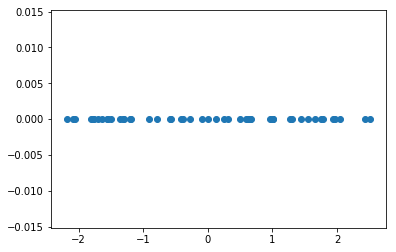

In [12]:
# Task 1: In each step, indicate what the code is doing. 
# Additionally, identify what each of the v1,..,v6 represent and write it in the comments

# Step 1: standardize the data by subtracting the mean and dividing by the standard deviation. 
#This is done by each feature individually
v1 =(df-df.mean())/df.std()
#v1: is the standardized data. 

# Step 2: compute the covariance matrix 
v2 = np.cov(v1.T)
#v2: is the covariance matrix

# Step 3: find eigenvalues/vectors. Eigenvectors are automatically sorted by eigenvalue is *ascending order*
v3, v4 = np.linalg.eigh(v2)
#v3: eigenvalues of the covariance matrix
#v4: eigenvectors of the covariance matrix

# Step 4: choose a number of principal components
v5 = 1
#v5: number of principal components

# Step 5: project data onto first principal component. This corresponds to the last eigenvector 
v6 = np.dot(v1, v4[:,1:2]).flatten()
#v6: is the list of projected data in R1

# Final Plot
plt.scatter(v6, np.zeros_like(v6))
print(v6)

This process, can be automated using the `sklearn` package PCA, as shown in the code below.

In [3]:
# Task 2: Modify the code below so that you obtain the same result as what you did by hand above: 
from sklearn.decomposition import PCA

#standardize data and choose number of components
sdf = #
n_components = #
pca = PCA(n_components=n_components)

#apply PCA
proj_sdata = pca.fit_transform(sdf)

#print and plot the final result


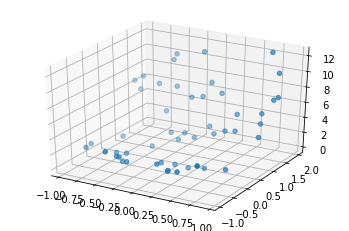

In [43]:
#Task 3: 3Generate 
x_rand = 2*np.random.rand(50)-1
y_rand = 3*np.random.rand(50)-1
z_rand = x_rand**2 + 3*y_rand**2 + np.random.rand(50)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_rand, y_rand, z_rand, marker='o')


In [ ]:
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['c', 'm', 'y'])
scatter = plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=colormap)
plt.legend(handles = scatter.legend_elements()[0], labels=list(iris['target_names']))
plt.xlabel('PCA component 1', fontsize=14)
plt.ylabel('PCA component 2', fontsize=14)

In [ ]:
# Import the dataset
df = pd.read_csv("gene_expression.csv")

# Separate features and labels
X = df.drop("Label", axis=1)
y = df["Label"]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2")
plt.title("PCA on Gene Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# Explained variance from PCA
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:20], marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
# Alternative: t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="Set1")
plt.title("t-SNE on Gene Expression Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

In [ ]:
# Alternative: UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

# Visualize UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="Set3")
plt.title("UMAP on Gene Expression Data")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

# Iris Classification
## 🌸 The Iris Dataset

The **Iris dataset** is a classic dataset used in statistics and machine learning. It contains measurements of iris flowers from three different species. The dataset contains samples of flowers consisting of four characteristics, and labeled by the corresponding flower species.

- **Total samples**: 150
- **Classes**: 3 iris species
  - *Setosa*
  - *Versicolor*
  - *Virginica*
- **Features**: 4 numeric measurements (in cm)

| Feature             | Description                           |
|---------------------|---------------------------------------|
| `sepal length`      | Length of the sepal (outer part)      |
| `sepal width`       | Width of the sepal                    |
| `petal length`      | Length of the petal (inner part)      |
| `petal width`       | Width of the petal                    |

---

An example of an individual sample looks like this:

| Sepal Length | Sepal Width | Petal Length | Petal Width | Species     |
|--------------|-------------|--------------|-------------|-------------|
| 5.1          | 3.5         | 1.4          | 0.2         | Setosa      |

---

The Iris dataset is widely used to:

- Practice **classification** (e.g., logistic regression, decision trees, SVMs)
- Apply **dimensionality reduction** (e.g., PCA, t-SNE)
- Explore **clustering** (e.g., k-means)
- Visualize data in 2D and 3D
- Test basic machine learning workflows

---

We'll start by loading the Dataset in Python

Using **scikit-learn**:
```python
from sklearn.datasets import load_iris

data = load_iris()
X = data.data       # shape: (150, 4)
y = data.target     # 0 = Setosa, 1 = Versicolor, 2 = Virginica


In [116]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
#Task 4
#Create a vector X in which each element is a list of 4 features


In [ ]:
#Task: Create a 3D visualization of the dataset using PCA. In your plot, different species should
# be repreented in different colors. 

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

Feature names (X): ['Chins', 'Situps', 'Jumps']
Target names (Y): ['Weight', 'Waist', 'Pulse']
X shape: (20, 3)
Y shape: (20, 3)
Explained variance ratio: [0.93014832 0.06621562]


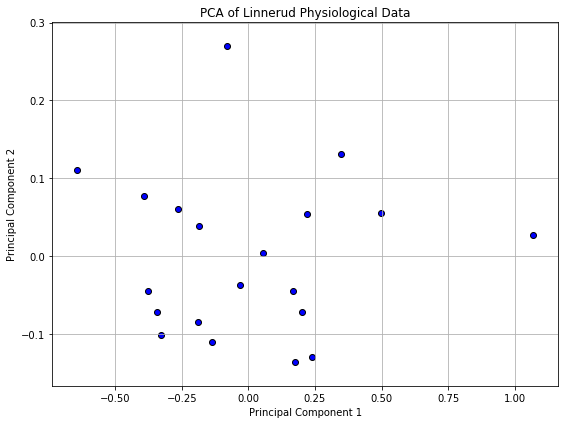

In [8]:
# 📚 Linnerud Dataset PCA Activity

# Step 1: Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.decomposition import PCA

# Step 2: Load the Linnerud dataset
data = load_linnerud()
X = data.data  # Exercise output (e.g. chin-ups, sit-ups, jumps)
Y = data.target  # Physiological data (e.g. weight, waist, pulse)

print("Feature names (X):", data.feature_names)
print("Target names (Y):", data.target_names)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Step 3: Standardize the physiological data (Y)
Y_scaled = (Y-Y.mean())/Y.std()

# Step 4: Apply PCA to standardized data
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5: Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], color='blue', edgecolor='k')
plt.title("PCA of Linnerud Physiological Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Optional — compare raw vs projected data
#print("\nOriginal physiological data (first 5 rows):")
#print(Y[:5])

#print("\nPCA-transformed data (first 5 rows):")
#print(Y_pca[:5])


In [6]:
print(Y)

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]



# MNIST Dataset: Handwritten Digits
Welcome! In this activity, you’ll explore how to apply **Principal Component Analysis (PCA)** to the **MNIST handwritten digits dataset**.

We'll use PCA to:
- Understand variance in image data
- Reduce the dimensionality of digit images
- Visualize high-dimensional data in 2D



In [11]:
# Load the MNIST-like digits dataset from scikit-learn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data  # shape: (1797, 64) — 8x8 pixel images
y = digits.target  # Digit labels (0 to 9)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


## 🔍 Visualize Sample Digits

Let’s take a look at a few sample images from the dataset to understand what we're working with.


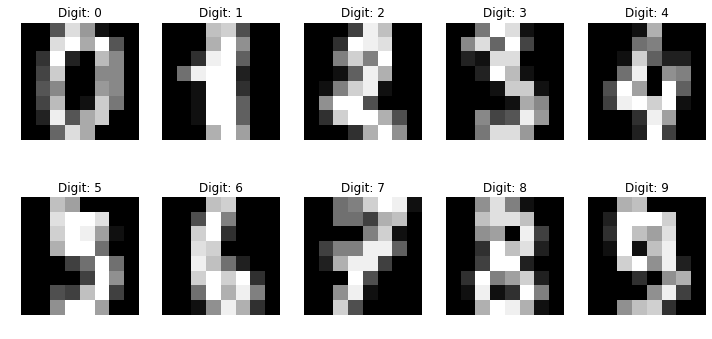

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
# Cell 7 - Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



Explained variance ratio: [0.12033916 0.09561054]


In [ ]:
#Task: find the overall ratio of variance explained by the first two components
print("Explained variance ratio:", pca.explained_variance_ratio_)

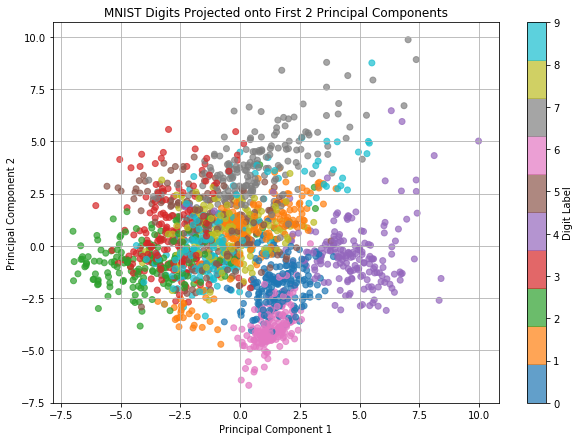

In [15]:
#Task: plot a 2D projection of your original data. As a bonus, try to color each digit in a different color. 
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("MNIST Digits Projected onto First 2 Principal Components")
plt.colorbar(scatter, label='Digit Label')
plt.grid(True)
plt.show()

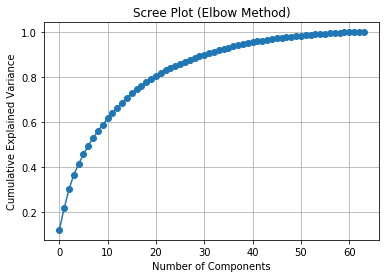

In [16]:
# Task: create a scree plot of the variance of each component
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Elbow Method)")
plt.grid(True)
plt.show()